# Compare Snapshots 
To understand the impact of changes, you can compare multiple snapshots together.   The final visulaization shows you a histogram of your snapshots overlaid with each other.
This visualization assumes you are using the same scorer and query set for all the snapshots.   It also assumes the snapshots come from the same case!

Please copy this example and customize it for your own purposes!

### Imports

In [1]:
%matplotlib inline

In [9]:
from js import fetch
import pandas as pd
from datetime import datetime
import random
from matplotlib import pyplot

## Define the Data You Want

In [10]:
CASE_ID = 6   # Your Case
SNAPSHOT_IDS = [1,2]   # Your Snapshots.  Use the Compare Snapshot function in Quepid to see what the specific ID's are of your snapshots.

### Pull data directly from Quepid's snapshot repository

In [13]:

# Retrieve from Quepid API all the snapshots
snapshots = []
for snapshot_id in SNAPSHOT_IDS:
    res = await fetch(f'/api/cases/{CASE_ID}/snapshots/{snapshot_id}.json')
    snapshots.append(await res.json())

### Read in data to a dataframe

In [14]:
queryData = []
snapshotNames = {}
# faking the data (for now)
for snapshot in snapshots:
    queryToScoreDict = {}
    queryToNumFoundDict = {}
    snapshotNames[snapshot.id] = snapshot.name
    for snapshotScore in snapshot.scores:
        queryToScoreDict[snapshotScore.queryId] = snapshotScore.score
        queryToNumFoundDict[snapshotScore.queryId] = snapshotScore.number_of_results
    for snapshotQuery in snapshot.queries:
        queryData.append({'snapshot_id':snapshot.id, 'query':snapshotQuery.query_text, 'numfound':queryToNumFoundDict[snapshotQuery.queryId], 'score':queryToScoreDict[snapshotQuery.queryId]})
    
df = pd.DataFrame(queryData)
df

,snapshot_id,query,numfound,score
0,1,cucumber,6,0.800000
1,1,sliced cheese,60,0.281429
2,1,ham,51,0.471356
3,1,nutella,4,1.000000
4,1,tomatoes,60,0.400505
5,1,aubergine,2,0.333333
6,1,vegan,60,0.000000
7,1,pizza sauce,60,0.800000
8,1,coke,60,0.790437
9,1,10354,1,1.000000


## Create a histogram to compare snapshots

The snapshots that are represented in fill color.

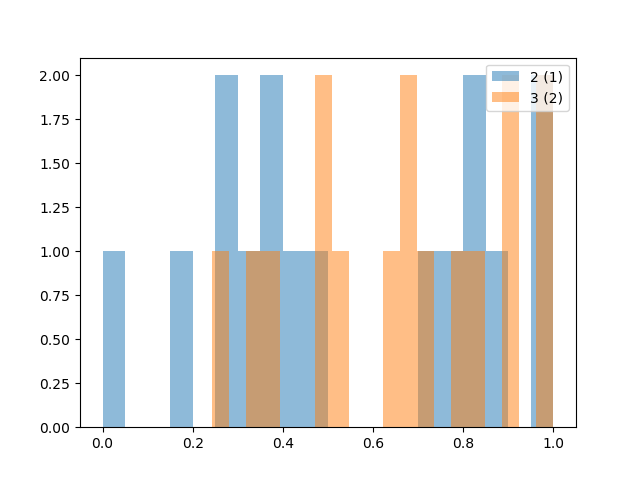

<Figure size 640x480 with 0 Axes>

In [15]:
for snapshot_id in SNAPSHOT_IDS:
    pyplot.hist(df.loc[df['snapshot_id'] == snapshot_id]['score'], 20, alpha=0.5, label=f'{snapshotNames[snapshot_id]} ({snapshot_id})')
pyplot.legend(loc='upper right')
pyplot.show()